In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx

# highway 150m morning....only 19+8 users till now

In [2]:
total_before_length=[[3877.3731509856593,
  9231.086895418153,
  13579.258811944039,
  17125.885545410674,
  2702.4502114771753],
 [21099.119136463436,
  1462.5829948063047,
  2832.141487779277,
  30938.650847233315,
  1865.4818520487565],
  [16542.25339560874,
  18515.603895488246,
  17023.358040196596,
  9405.774836704995,
  3220.6205045545885],
 [20635.519301690132,
  4802.74509673399,
  11954.350324628032,
  18067.67944708957,
  6768.699641092408],
 [3006.5851943696834,
  18814.05066852482,
  2870.0086291392813,
  7560.1023241434705,
  3953.8225242084723],
 [16376.561195542172,
  18515.60389548825,
  33818.36729927652,
  4802.74509673399,
  5188.746675292308],
 [19713.970925774218,
  14734.493067010737,
  1003.9135274839227,
  15761.61525853062,
  3123.241409143459],
 [20498.833861678097,
  17230.40356901265,
  16344.763616373282,
  9781.818018367332,
  9387.710145754509],
  [3044.927665434795,
  12169.222419637601,
  3514.2064491187643,
  3986.702678512725,
  12346.672680513107],
 [18587.485248697936,
  19747.33064356659,
  36601.45472475752,
  12782.667479410446,
  3162.441652992117],
 [2071.2715850495465,
  4587.270887538745,
  2867.6828758007427,
  11405.502863170064,
  3262.0280699137643],
 [4132.973850687494,
  3162.441652992117,
  3734.504198338533,
  35954.217478448234,
  16370.983811351049],
 [8998.194335936723,
  9666.869227359657,
  4802.74509673399,
  3514.2064491187643,
  9008.453754665023],
  [3162.441652992117, 
  4387.457290266373,
  8920.942902563436, 
  11421.193409158326],
 [15161.073941675932,
  18515.60389548825,
  5236.6459223969905,
  14564.324102162944],
 [4651.690118665978, 
 9215.963718630997, 
 13001.65135058267, 
 13177.038038972358],
 [2867.6828758007423,
  18515.60389548825,
  15548.055366918357,
  17023.358040196596],
 [16542.25339560874, 
 18337.33475720831, 
 6861.371649626314, 
 2562.1126263383258],
 [4387.457290266373, 
 3262.0280699137643, 
 35380.4927399436, 
 17125.885545410674],
 [2850.88, 9005.622, 21433.697, 14622.57],
[7432.1948, 11396.177, 2366.938, 4387.457],
[5237.929, 11350.686, 4096.548, 4096.548],
[17373.34, 17811.92, 3734.504, 11312.790],
[5237.9296, 11434.044, 4664.55, 9008.4537],
[12299.48, 9203.3128, 4696.249, 11957.279],
[13889.625, 3262.028, 3162.4416, 3432.766],
[3860.434, 10119.176, 11405.50, 14212.468]]

total_before_street=[[21, 110, 75, 140, 17], 
[217, 2, 14, 250, 16],
[132, 144, 137, 78, 20],
 [198, 39, 138, 162, 45],
 [18, 149, 15, 72, 27],
 [129, 144, 285, 39, 46],
 [176, 95, 1, 71, 36],
 [176, 148, 148, 90, 78],
 [18, 38, 18, 25, 132],
 [168, 174, 304, 145, 17],
 [13, 39, 16, 111, 38],
 [37, 17, 25, 304, 120],
 [107, 88, 39, 18, 48],
 [17, 25, 75, 140],
 [143, 144, 41, 166],
 [27, 19, 103, 109],
 [16, 144, 98, 137],
 [132, 139, 46, 19],
 [25, 38, 297, 140],
 [16, 115, 189, 85],
[69, 136, 4, 25],
[47, 23, 7, 7],
[150, 160, 17,135],
[47, 137, 31, 48],
[55, 75, 43, 115],
[114, 38, 17, 8],
[27, 94, 111, 164]]

total_after_length=[[3877.3731509856593,
  9231.086895418153,
  13579.258811944039,
  12822.57636739646,
  2702.4502114771753],
 [20005.698481095962,
  854.4939103386009,
  675.703188033146,
  3412.959883537566,
  1865.4818520487565],
  [16542.25339560874,
  17193.59731601513,
  6070.357437751509,
  9405.774836704995,
  3220.6205045545885],
 [10106.303380857576,
  1845.3751798868338,
  11480.08333111119,
  17492.332116933085,
  6768.699641092408],
 [3006.5851943696834,
  18498.31589408732,
  2012.1622034534616,
  74.18505790764355,
  3953.8225242084723],
 [12053.553196054254,
  3366.3951951843287,
  653.3223724237865,
  4802.74509673399,
  5188.746675292308],
 [19713.970925774218,
  14734.493067010737,
  1003.9135274839227,
  15761.61525853062,
  3123.241409143459],
  [20498.833861678097,
  17230.40356901265,
  15828.023254237283,
  9781.818018367332,
  9387.710145754509],
 [3044.927665434795,
  3733.0840924853173,
  2133.0421434269156,
  3986.702678512725,
  12346.672680513107],
 [18587.485248697936,
  18035.580268164373,
  6546.292812658934,
  12782.667479410446,
  3162.441652992117],
 [2071.2715850495465,
  4587.270887538745,
  2867.6828758007427,
  11200.3478247533,
  3262.0280699137643],
 [4132.973850687494,
  3162.441652992117,
  3734.504198338533,
  30503.958298992227,
  16370.983811351049],
 [8998.194335936723,
  7645.121934723163,
  4802.74509673399,
  2244.207013829231,
  9008.453754665023],
  [3162.441652992117,
  4387.457290266373,
  5186.4944937264445,
  11421.193409158326],
 [15161.073941675932,
  18451.20396211225,
  5236.6459223969905,
  14564.324102162944],
 [3361.287945589176, 
 9215.963718630997, 
 13001.65135058267, 
 13177.038038972358],
 [2867.6828758007423,
  18515.60389548825,
  15548.055366918357,
  17023.358040196596],
 [16542.25339560874,
  13557.288819883152,
  5931.845992990348,
  2562.1126263383258],
 [4387.457290266373,
  3262.0280699137643,
  30266.462505747928,
  17125.885545410674],
  [2850.88, 9005.622, 21433.697, 14622.57],
[3738.905,335.99,2366.938, 4387.457],
[5237.9296,10538.592 ,4096.548, 4096.548],
[17373.347,11947.488, 3734.504, 11312.790],
[2143.608,11099.9159, 4664.55, 9008.4537],
[12299.48, 9203.3128, 4696.249, 11957.279],
[13889.625, 3262.028, 3162.4416, 3432.766],
[3860.434, 10119.176, 11405.50, 14212.468]]

total_after_street=[[21, 110, 75, 97, 17], 
[204, 1, 7, 22, 16],
[132, 142, 52, 78, 20],
 [87, 22, 135, 151, 45],
 [18, 147, 14, 1, 27],
 [92, 42, 19, 39, 46],
 [176, 95, 1, 71, 36],
 [176, 148, 145, 90, 78],
 [18, 20, 15, 25, 132],
 [168, 162, 80, 145, 17],
 [13, 39, 16, 108, 38],
 [37, 17, 25, 246, 120],
 [107, 62, 39, 14, 48],
 [17, 25, 34, 140],
 [143, 143, 41, 166],
 [16, 19, 103, 109],
 [16, 144, 98, 137],
 [132, 104, 36, 19],
 [25, 38, 243, 140],
 [16, 115, 189, 85],
[49,12,4,25],
[47, 21, 7, 7],
[150 ,98, 17, 135],
[17, 136, 31, 48],
[55, 75, 43, 115],
[114, 38, 17, 8],
[27, 94, 111, 164]]


In [3]:
len(total_after_length)

27

# Minimum corresponding to each user

In [4]:
min_total_after_length=[]
for i in total_after_length:
    min_total_after_length.append(min(i))
#min_total_after_length

min_total_before_length=[]
for i in total_before_length:
    min_total_before_length.append(min(i))

In [5]:
import matplotlib.pyplot as plt

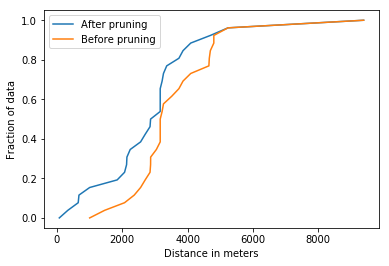

In [6]:
sorted_data = np.sort(min_total_after_length)

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label='After pruning')

sorted_data2 = np.sort(min_total_before_length)
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Distance in meters")
plt.ylabel("Fraction of data")
plt.legend()
plt.show()


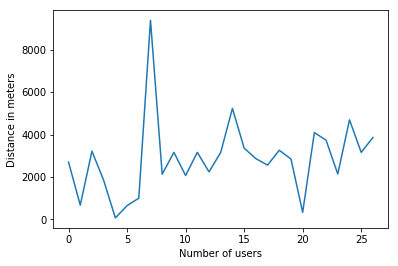

In [7]:
plt.plot(min_total_after_length)
plt.ylabel("Distance in meters")
plt.xlabel("Number of users")
plt.show()

In [8]:
min(min_total_after_length)

74.18505790764355

In [9]:
sorted_data

array([  74.18505791,  335.99      ,  653.32237242,  675.70318803,
       1003.91352748, 1845.37517989, 2071.27158505, 2133.04214343,
       2143.608     , 2244.20701383, 2562.11262634, 2702.45021148,
       2850.88      , 2867.6828758 , 3162.4416    , 3162.44165299,
       3162.44165299, 3162.44165299, 3220.62050455, 3262.02806991,
       3361.28794559, 3734.504     , 3860.434     , 4096.548     ,
       4696.249     , 5236.6459224 , 9387.71014575])

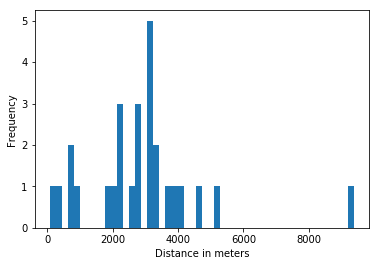

In [10]:
plt.hist(sorted_data,bins=50)
plt.ylabel("Frequency")
plt.xlabel("Distance in meters")
plt.show()

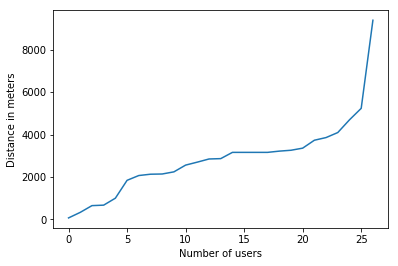

In [11]:
plt.plot(sorted_data)
plt.xlabel("Number of users")
plt.ylabel("Distance in meters")
plt.show()

# Considering all data

In [12]:
combined_length=[]
for i in total_after_length:
    for j in i:
        combined_length.append(j)
combined_length

combined_length2=[]
for i in total_before_length:
    for j in i:
        combined_length2.append(j)
combined_length2
    

[3877.3731509856593,
 9231.086895418153,
 13579.258811944039,
 17125.885545410674,
 2702.4502114771753,
 21099.119136463436,
 1462.5829948063047,
 2832.141487779277,
 30938.650847233315,
 1865.4818520487565,
 16542.25339560874,
 18515.603895488246,
 17023.358040196596,
 9405.774836704995,
 3220.6205045545885,
 20635.519301690132,
 4802.74509673399,
 11954.350324628032,
 18067.67944708957,
 6768.699641092408,
 3006.5851943696834,
 18814.05066852482,
 2870.0086291392813,
 7560.1023241434705,
 3953.8225242084723,
 16376.561195542172,
 18515.60389548825,
 33818.36729927652,
 4802.74509673399,
 5188.746675292308,
 19713.970925774218,
 14734.493067010737,
 1003.9135274839227,
 15761.61525853062,
 3123.241409143459,
 20498.833861678097,
 17230.40356901265,
 16344.763616373282,
 9781.818018367332,
 9387.710145754509,
 3044.927665434795,
 12169.222419637601,
 3514.2064491187643,
 3986.702678512725,
 12346.672680513107,
 18587.485248697936,
 19747.33064356659,
 36601.45472475752,
 12782.66747941

In [13]:
len(combined_length)

121

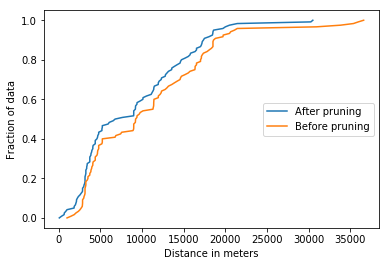

In [14]:
sorted_data = np.sort(combined_length)
sorted_data2 = np.sort(combined_length2)

sorted_data=sorted_data
sorted_data2=sorted_data2

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label="After pruning")
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Distance in meters")
plt.ylabel("Fraction of data")
plt.legend(loc="center right")
plt.show()

In [15]:
sorted_data

array([   74.18505791,   335.99      ,   653.32237242,   675.70318803,
         854.49391034,  1003.91352748,  1845.37517989,  1865.48185205,
        2012.16220345,  2071.27158505,  2133.04214343,  2143.608     ,
        2244.20701383,  2366.938     ,  2562.11262634,  2702.45021148,
        2850.88      ,  2867.6828758 ,  2867.6828758 ,  3006.58519437,
        3044.92766543,  3123.24140914,  3162.4416    ,  3162.44165299,
        3162.44165299,  3162.44165299,  3220.62050455,  3262.028     ,
        3262.02806991,  3262.02806991,  3361.28794559,  3366.39519518,
        3412.95988354,  3432.766     ,  3733.08409249,  3734.504     ,
        3734.50419834,  3738.905     ,  3860.434     ,  3877.37315099,
        3953.82252421,  3986.70267851,  4096.548     ,  4096.548     ,
        4132.97385069,  4387.457     ,  4387.45729027,  4387.45729027,
        4587.27088754,  4664.55      ,  4696.249     ,  4802.74509673,
        4802.74509673,  5186.49449373,  5188.74667529,  5236.6459224 ,
      

# Top 50 

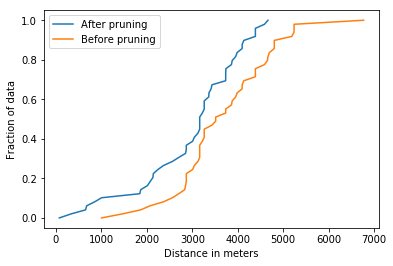

In [16]:
sorted_data = np.sort(combined_length)
sorted_data2 = np.sort(combined_length2)

sorted_data=sorted_data[:50]
sorted_data2=sorted_data2[:50]

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label="After pruning")
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Distance in meters")
plt.ylabel("Fraction of data")
plt.legend(loc="upper left")
plt.show()

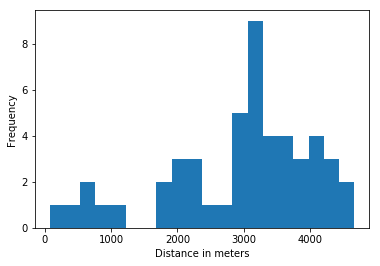

In [17]:
sorted_data = np.sort(combined_length)
sorted_data2 = np.sort(combined_length2)
plt.hist(sorted_data[:50],bins=20)
plt.ylabel("Frequency")
plt.xlabel("Distance in meters")
plt.show()

# In terms of street

# Minimum corresponding to each user

In [18]:
min_total_after_street=[]
for i in total_after_street:
    min_total_after_street.append(min(i))
#min_total_after_street
min_total_before_street=[]
for i in total_before_street:
    min_total_before_street.append(min(i))

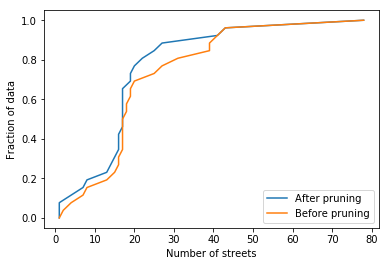

In [19]:
sorted_data = np.sort(min_total_after_street)

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label='After pruning')

sorted_data2 = np.sort(min_total_before_street)
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Number of streets")
plt.ylabel("Fraction of data")
plt.legend()
plt.show()



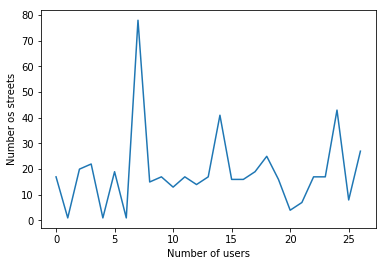

In [20]:
plt.plot(min_total_after_street)
plt.ylabel("Number os streets")
plt.xlabel("Number of users")
plt.show()

In [21]:
sorted_data

array([ 1,  1,  1,  4,  7,  8, 13, 14, 15, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 19, 19, 20, 22, 25, 27, 41, 43, 78])

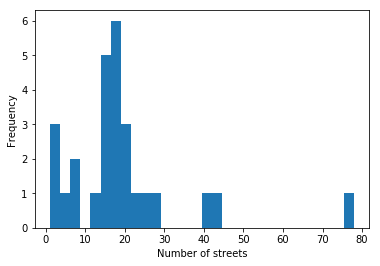

In [22]:
plt.hist(sorted_data,bins=30)
plt.ylabel("Frequency")
plt.xlabel("Number of streets")
plt.show()

In [23]:
sorted_data

array([ 1,  1,  1,  4,  7,  8, 13, 14, 15, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 19, 19, 20, 22, 25, 27, 41, 43, 78])

# Considering all data 

In [24]:
combined_length=[]
for i in total_after_street:
    for j in i:
        combined_length.append(j)
combined_length

combined_length2=[]
for i in total_before_street:
    for j in i:
        combined_length2.append(j)
combined_length2
    

[21,
 110,
 75,
 140,
 17,
 217,
 2,
 14,
 250,
 16,
 132,
 144,
 137,
 78,
 20,
 198,
 39,
 138,
 162,
 45,
 18,
 149,
 15,
 72,
 27,
 129,
 144,
 285,
 39,
 46,
 176,
 95,
 1,
 71,
 36,
 176,
 148,
 148,
 90,
 78,
 18,
 38,
 18,
 25,
 132,
 168,
 174,
 304,
 145,
 17,
 13,
 39,
 16,
 111,
 38,
 37,
 17,
 25,
 304,
 120,
 107,
 88,
 39,
 18,
 48,
 17,
 25,
 75,
 140,
 143,
 144,
 41,
 166,
 27,
 19,
 103,
 109,
 16,
 144,
 98,
 137,
 132,
 139,
 46,
 19,
 25,
 38,
 297,
 140,
 16,
 115,
 189,
 85,
 69,
 136,
 4,
 25,
 47,
 23,
 7,
 7,
 150,
 160,
 17,
 135,
 47,
 137,
 31,
 48,
 55,
 75,
 43,
 115,
 114,
 38,
 17,
 8,
 27,
 94,
 111,
 164]

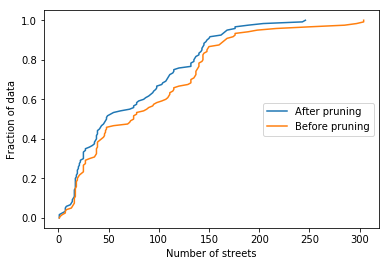

In [25]:
sorted_data = np.sort(combined_length)
sorted_data2 = np.sort(combined_length2)

sorted_data=sorted_data
sorted_data2=sorted_data2

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label="After pruning")
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Number of streets")
plt.ylabel("Fraction of data")
plt.legend(loc="center right")
plt.show()

# Top 50

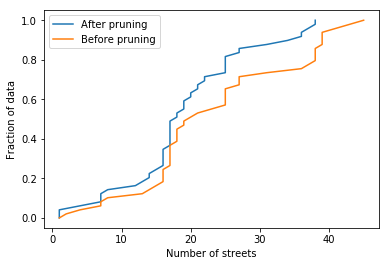

In [26]:
sorted_data = np.sort(combined_length)
sorted_data2 = np.sort(combined_length2)

sorted_data=sorted_data[:50]
sorted_data2=sorted_data2[:50]

yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,yvals,label="After pruning")
plt.plot(sorted_data2,yvals,label="Before pruning")

plt.xlabel("Number of streets")
plt.ylabel("Fraction of data")
plt.legend(loc="upper left")
plt.show()

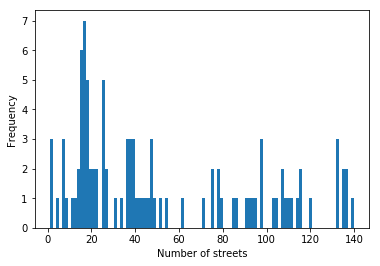

In [27]:
sorted_data = np.sort(combined_length)
plt.hist(sorted_data[:100],bins=100)
plt.ylabel("Frequency")
plt.xlabel("Number of streets")
plt.show()

In [28]:
len(combined_length2)

121

In [29]:
sorted_data

array([  1,   1,   1,   4,   7,   7,   7,   8,  12,  13,  14,  14,  15,
        16,  16,  16,  16,  16,  17,  17,  17,  17,  17,  17,  17,  18,
        18,  19,  19,  19,  20,  20,  21,  21,  22,  22,  25,  25,  25,
        25,  25,  27,  27,  31,  34,  36,  36,  37,  38,  38,  38,  39,
        39,  39,  41,  42,  43,  45,  46,  47,  48,  48,  49,  52,  55,
        62,  71,  75,  75,  78,  78,  80,  85,  87,  90,  92,  94,  95,
        97,  98,  98, 103, 104, 107, 108, 109, 110, 111, 114, 115, 115,
       120, 132, 132, 132, 135, 135, 136, 137, 140, 140, 142, 143, 143,
       144, 145, 145, 147, 148, 150, 151, 162, 164, 166, 168, 176, 176,
       189, 204, 243, 246])